## Sensor BMP 280  instalado no NERDS

Dois sensores instalados no NERDS a partir de 2019

Dados extraídos do ThingSpeak:
https://thingspeak.com/channels/897270

Neste laboratório iremos ver:
1. Como carregar os dados
2. Estatísticas básicas
3. Sumarização de dados e visualização como série temporal
4. Detecção de anomalias

In [27]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

As principais colunas exportadas pelo ThingSpeak são:



1.   created_at: Timestamp do recebimento dos dados
2.   entry_id: identificador único
3.   field_1: temperatura em celsius
4.   field_2: Umidade
5.   field_3: Pressão



In [28]:
#You need to change your file location
#index_col="Date"
df = pd.read_csv("feeds_sensor_bmp280_1_datacenter.csv",  sep=',', decimal='.',parse_dates=["created_at"])
df.head()

,created_at,entry_id,field1,field2,field3,latitude,longitude,elevation,status
0,2019-11-07 16:02:39+00:00,1,25.32,58.47949,101426.14062,NaN,NaN,NaN,NaN
1,2019-11-07 16:03:00+00:00,2,25.38,57.75977,101428.11719,NaN,NaN,NaN,NaN
2,2019-11-07 16:03:20+00:00,3,25.43,58.45312,101427.57812,NaN,NaN,NaN,NaN
3,2019-11-07 16:03:41+00:00,4,25.44,57.12012,101429.26562,NaN,NaN,NaN,NaN
4,2019-11-07 16:04:03+00:00,5,25.44,56.76172,101431.21875,NaN,NaN,NaN,NaN


In [29]:
#Renomeando as colunas para melhorar logica
df = df.rename(columns={"field1":"temp","field2":"umidade","field3":"pressao"}, errors="raise")
print("Dataframe columns:", df.columns)

Dataframe columns: Index(['created_at', 'entry_id', 'temp', 'umidade', 'pressao', 'latitude',
       'longitude', 'elevation', 'status'],
      dtype='object')


Verificando estatísticas básicas sobre uma coluna.



* count	Number of non-null observations
* sum	Sum of values
* mean	Mean of values
* mad	Mean absolute deviation
* median	Arithmetic median of values
* min	Minimum
* max	Maximum
* mode	Mode
* abs	Absolute Value
* prod	Product of values
* std	Unbiased standard deviation
* var	Unbiased variance
* sem	Unbiased standard error of the mean
* skew	Unbiased skewness (3rd moment)
* kurt	Unbiased kurtosis (4th moment)
* quantile	Sample quantile (value at %)
* cumsum	Cumulative sum
* cumprod	Cumulative product
* cummax	Cumulative maximum
* cummin	Cumulative minimum

As estatísticas básicas ofereciadas pelo Panda podem ser consultadas em:
https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html


In [30]:
#Contar quantas ocorrências tem no dataset
df['created_at'].count()


806600

In [31]:
#Temperatura máxima
df['temp'].max()

38.47

In [32]:
#Descrição sumarizada de uma coluna
df['temp'].describe()

count    806599.000000
mean         19.096703
std           5.810678
min           4.840000
25%          17.680000
50%          19.760000
75%          21.130000
max          38.470000
Name: temp, dtype: float64

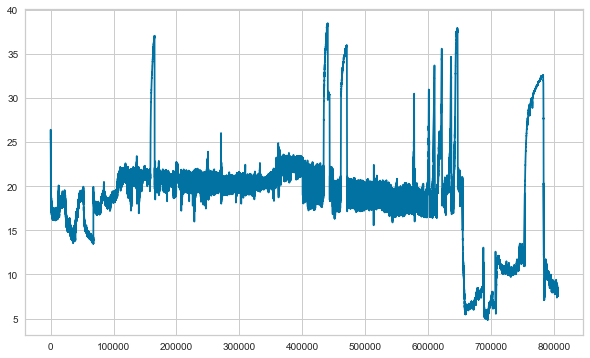

In [33]:
#Visualizando a evolução da figura com o passar do tempo
plt.figure(figsize=(10, 6))
#plt.plot(time[start:end], series[start:end], format, label=label)
plt.plot(df["temp"])
plt.show()

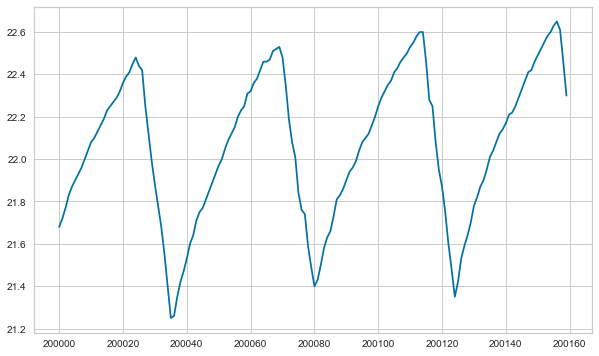

In [34]:
#ploting temperature
plt.figure(figsize=(10, 6))
plt.plot(df["temp"][200000:200160])
plt.show()

Os dados de temperatura estão a cada 20s. O que torna a visualização difícil. Podemos então  utilizar as funções de agrupamento do dataset:

In [35]:
df['NewDateTime'] = pd.to_datetime(df['created_at'])
df.index = df['NewDateTime']
df_A = df.resample('H').mean()

df_A.head()

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status
NewDateTime,,,,,,,,
2019-11-07 16:00:00+00:00,65.0,25.495116,53.932390,101397.304929,NaN,NaN,NaN,NaN
2019-11-07 17:00:00+00:00,165.0,24.105493,43.785129,101325.315470,NaN,NaN,NaN,NaN
2019-11-07 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


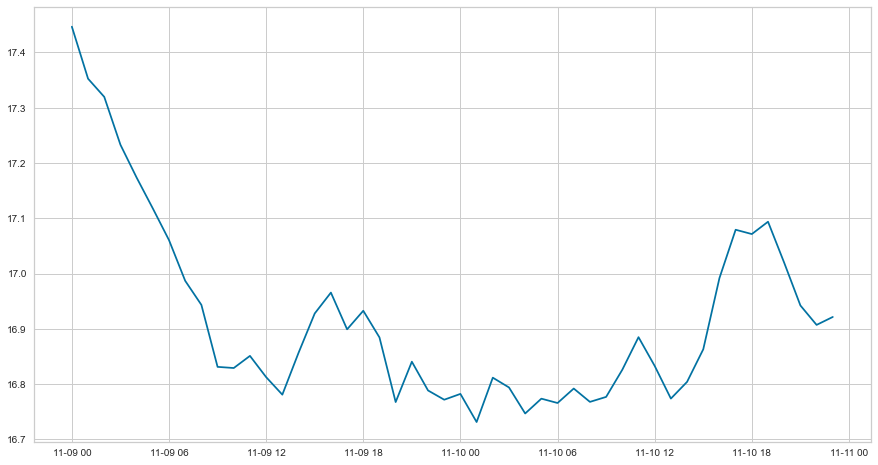

In [36]:
plt.figure(figsize=(15, 8))
#plt.plot(time[start:end], series[start:end], format, label=label)
plt.plot(df_A["temp"]["2019-11-09":"2019-11-10"])
#plt.plot(df_A["temp"])
plt.show()

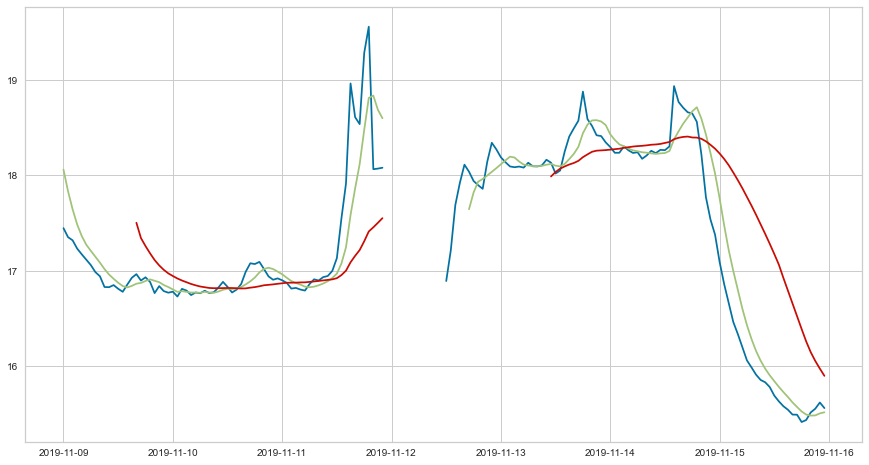

In [37]:
#Calculando e plotando as médias móveis
#Média móvel para cada 6h 
df_A['MA6'] = df_A['temp'].rolling(6).mean()
#Média móvel para cada 24h 
df_A['MA24'] = df_A['temp'].rolling(24).mean()
#Plotando
plt.figure(figsize=(15, 8))
plt.plot(df_A["temp"]["2019-11-09":"2019-11-15"])
plt.plot(df_A["MA6"]["2019-11-09":"2019-11-15"])
plt.plot(df_A["MA24"]["2019-11-09":"2019-11-15"])
plt.show()

## Correlação

A correlação permite identificar colunas que se correlacionam. 

Importante: Modelos de aprendizado dependem de correlação entre os dados. 

In [38]:
df.corr()

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status
entry_id,1.000000,-0.221997,-0.423229,0.515365,NaN,NaN,NaN,NaN
temp,-0.221997,1.000000,-0.164981,-0.229611,NaN,NaN,NaN,NaN
umidade,-0.423229,-0.164981,1.000000,-0.170522,NaN,NaN,NaN,NaN
pressao,0.515365,-0.229611,-0.170522,1.000000,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Detecção de anomalias em séries temporais

Detecção de anomalias é uma técnica usada para identificar itens, eventos ou observações que levantam "suspeitas" por diferir significativamente da maioria dos dados.

Detecção de anomalias é extremamente importante em diversas áreas de IoT. Monitoramento ambiental, industrial, etc devem tomar decisões importantes ao detectar anomalias. 

Neste exemplo, iremos utilizar a biblioteca **pycaret** para realizar detecção de anomalias. 

`PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows.`
More in: https://github.com/pycaret/pycaret

https://pycaret.org/anomaly-detection/

Para isto: 
1. Instalar o pycaret
  - Ao instalar o pycaret ele irá dar problemas de compatibilidade (Problema ocorrido em 07/2022 ).  
  - Instalar o pycaret e se apenas pedir para restart runtime, dê o restart. Se der problemas, instale primeiramente o comando em seguida.
  - Execute  o pip install markupsafe
  - reinicialize a runtime
  - Importe os pacotes de anomalia e o pacote Jinja 2. 

2. Preparar os dados
3. Definir o melhor modelo ou algoritmo



In [13]:
#Instalando e importando o pycaret
#!pip install pycaret
#!pip install --pre pycaret
#pip install pycaret[full]


In [14]:
# pip install markupsafe==2.0.1

In [15]:
import jinja2
from pycaret.anomaly import *

## Preparando os dados

Como os algoritmos do pycaret não podem consumir dados de um tipo timestamp diretamente, extrairemos os recursos do timestamp e eliminaremos a coluna de timestamp antes de treinar os modelos.

In [39]:
# drop colunas desnecessárias
#df_A.drop(['latitude', 'longitude','elevation', 'status', 'entry_id'], axis=1, inplace=True)
#df_A.drop(['MA6', 'MA24'], axis=1, inplace=True)
#df_A.drop(['umidade', 'pressao'], axis=1, inplace=True)
df_A.dropna()

df_A.head()

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24
NewDateTime,,,,,,,,,,
2019-11-07 16:00:00+00:00,65.0,25.495116,53.932390,101397.304929,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 17:00:00+00:00,165.0,24.105493,43.785129,101325.315470,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Comum a todos os módulos do PyCaret, a função de setup é a primeira e única etapa obrigatória para iniciar qualquer experimento de aprendizado de máquina no PyCaret. Além de realizar algumas tarefas básicas de processamento por padrão, o PyCaret também oferece uma ampla gama de recursos de pré-processamento. Ver git.


In [40]:
# inicializa setup
s = setup(df_A, session_id = 123)

In [41]:
# Verificar modelos disponíveis
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [42]:
model = create_model('iforest', fraction = 0.01)
model_results = assign_model(model)
model_results.head()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:11:14
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,
2019-11-07 16:00:00+00:00,65.0,25.495117,53.932392,101397.304688,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.128912
2019-11-07 17:00:00+00:00,165.0,24.105494,43.785130,101325.312500,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.098650
2019-11-07 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.299794
2019-11-07 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.299794
2019-11-07 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-0.299794


Observe que duas novas colunas são anexadas, ou seja, Anomaly que contém o valor 1 para outlier e 0 para inlier e Anomaly_Score que é um valor contínuo (internamente, o algoritmo calcula a pontuação com base na qual a anomalia é determinada).

In [43]:
# check anomalies
model_results[model_results['Anomaly'] == 1].head()

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,
2019-12-21 18:00:00+00:00,162364.5,34.669136,52.437405,101367.898438,NaN,NaN,NaN,NaN,34.087616,30.459307,1,0.000029
2019-12-21 19:00:00+00:00,162539.0,34.907715,52.046227,101343.937500,NaN,NaN,NaN,NaN,34.324848,31.033972,1,0.004108
2019-12-21 20:00:00+00:00,162713.5,35.143333,51.691444,101330.453125,NaN,NaN,NaN,NaN,34.559273,31.583122,1,0.006333
2019-12-21 21:00:00+00:00,162887.5,35.337357,51.461472,101350.789062,NaN,NaN,NaN,NaN,34.786690,32.030090,1,0.006479
2019-12-21 22:00:00+00:00,163061.5,35.503849,51.263599,101375.109375,NaN,NaN,NaN,NaN,35.001648,32.413544,1,0.010673


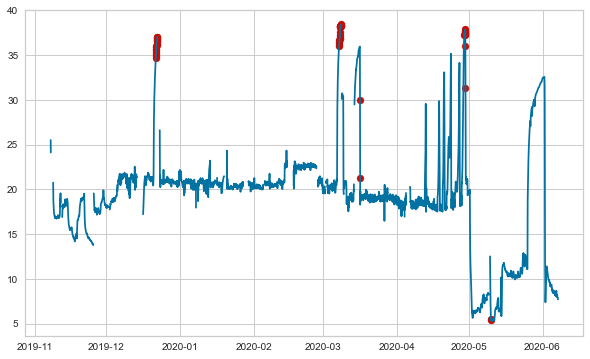

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(model_results["temp"])
# create list of outlier_dates
outlier_dates = model_results[model_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [model_results.loc[i]['temp'] for i in outlier_dates]

plt.scatter(outlier_dates, y_values, c="r")

plt.show()

In [45]:
outlier_dates

DatetimeIndex(['2019-12-21 18:00:00+00:00', '2019-12-21 19:00:00+00:00',
               '2019-12-21 20:00:00+00:00', '2019-12-21 21:00:00+00:00',
               '2019-12-21 22:00:00+00:00', '2019-12-21 23:00:00+00:00',
               '2019-12-22 00:00:00+00:00', '2019-12-22 01:00:00+00:00',
               '2019-12-22 02:00:00+00:00', '2019-12-22 03:00:00+00:00',
               '2019-12-22 04:00:00+00:00', '2019-12-22 05:00:00+00:00',
               '2019-12-22 06:00:00+00:00', '2019-12-22 07:00:00+00:00',
               '2019-12-22 08:00:00+00:00', '2019-12-22 09:00:00+00:00',
               '2019-12-22 10:00:00+00:00', '2020-03-07 15:00:00+00:00',
               '2020-03-07 16:00:00+00:00', '2020-03-07 17:00:00+00:00',
               '2020-03-07 18:00:00+00:00', '2020-03-07 19:00:00+00:00',
               '2020-03-07 20:00:00+00:00', '2020-03-07 21:00:00+00:00',
               '2020-03-07 22:00:00+00:00', '2020-03-07 23:00:00+00:00',
               '2020-03-08 00:00:00+00:00', '2020-0

## Exercício 

Fazer um resumo do que é cada um destes modelos. Ver definição Wikipedia. 

## Aplicando um modelo



### Exercícios

1. Cada estudante irá escolher um modelo. (3 minutos)
2. Buscar e estudar  a definição deste modelo (e.g Wikipedia) (10 minutos)
3. Executar o modelo neste dataset. (5 min)
4. Apresentar o resultado (5 min para cada)?

### sos ("Stochastic Outlier Selection")

O SOS se baseia no pressuposto de que os outliers são menos prováveis de ocorrerem quando comparados aos exemplos típicos do conjunto de dados. Ele usa a distribuição dos dados para calcular uma pontuação de anomalia para cada observação. Quanto maior a pontuação de anomalia, maior a probabilidade de ser um outlier.

Especialmente adequado para situações em que se deseja identificar outliers em conjuntos de dados de alta dimensionalidade. 

In [46]:
display(df_A)

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24
NewDateTime,,,,,,,,,,
2019-11-07 16:00:00+00:00,65.0,25.495116,53.932390,101397.304929,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 17:00:00+00:00,165.0,24.105493,43.785129,101325.315470,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-06-07 07:00:00+00:00,805991.0,7.874046,57.023517,102066.411713,NaN,NaN,NaN,NaN,8.041343,8.234509
2020-06-07 08:00:00+00:00,806164.5,7.885172,56.897792,102107.926499,NaN,NaN,NaN,NaN,8.016132,8.223359
2020-06-07 09:00:00+00:00,806338.5,7.881207,57.170601,102167.213990,NaN,NaN,NaN,NaN,7.962258,8.210165


In [57]:
model_sos = create_model('sos', fraction = 0.2)
model_sos_results = assign_model(model_sos)
model_sos_results.head()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:15:51
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,
2019-11-07 16:00:00+00:00,65.0,25.495117,53.932392,101397.304688,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2019-11-07 17:00:00+00:00,165.0,24.105494,43.785130,101325.312500,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2019-11-07 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2019-11-07 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2019-11-07 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [58]:
# check anomalies
model_sos_results[model_sos_results['Anomaly'] == 1].head()

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,


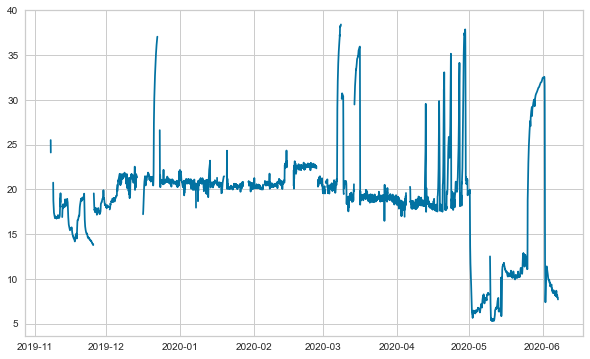

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(model_sos_results["temp"])
# create list of outlier_dates
outlier_dates = model_sos_results[model_sos_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [model_sos_results.loc[i]['temp'] for i in outlier_dates]

plt.scatter(outlier_dates, y_values, c="r")

plt.show()


O modelo não apresentou anomalias -> intrigante

### histogram ("Histogram-based Outlier Detection")

Esse método se baseia na construção de um histograma dos valores presentes no conjunto de dados e na identificação de regiões do histograma que contenham poucos dados. Essas regiões são consideradas suspeitas de conter outliers.

Especialmente adequado para conjuntos de dados unidimensionais ou com distribuições bem definidas. 

In [60]:
model_hist = create_model('histogram', fraction = 0.01)
model_hist_results = assign_model(model_hist)
model_hist_results.head()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:22:39
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,
2019-11-07 16:00:00+00:00,65.0,25.495117,53.932392,101397.304688,NaN,NaN,NaN,NaN,NaN,NaN,0,16.569563
2019-11-07 17:00:00+00:00,165.0,24.105494,43.785130,101325.312500,NaN,NaN,NaN,NaN,NaN,NaN,0,16.532100
2019-11-07 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.986328
2019-11-07 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.986328
2019-11-07 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,14.986328


In [61]:
# check anomalies
model_hist_results[model_hist_results['Anomaly'] == 1].head()

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,
2019-12-22 04:00:00+00:00,164105.5,36.419136,49.708660,101361.968750,NaN,NaN,NaN,NaN,36.049168,34.131001,1,19.610787
2019-12-22 05:00:00+00:00,164279.5,36.538105,49.443657,101329.539062,NaN,NaN,NaN,NaN,36.197968,34.362526,1,19.610787
2019-12-22 06:00:00+00:00,164453.5,36.652527,49.217354,101319.898438,NaN,NaN,NaN,NaN,36.333466,34.583130,1,19.610787
2019-12-22 07:00:00+00:00,164627.5,36.770287,49.001488,101357.273438,NaN,NaN,NaN,NaN,36.462788,34.792534,1,19.610787
2019-12-22 08:00:00+00:00,164802.0,36.876286,48.825535,101410.203125,NaN,NaN,NaN,NaN,36.587227,34.992397,1,19.610787


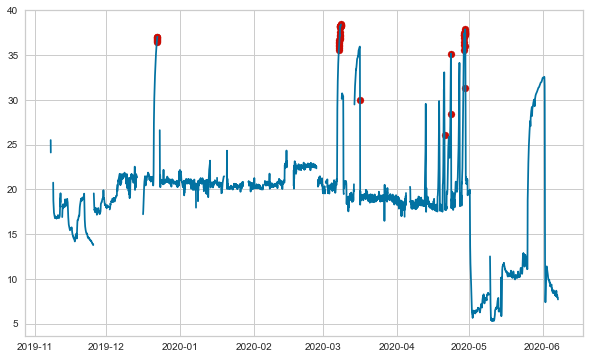

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(model_hist_results["temp"])
# create list of outlier_dates
outlier_dates = model_hist_results[model_hist_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [model_hist_results.loc[i]['temp'] for i in outlier_dates]

plt.scatter(outlier_dates, y_values, c="r")

plt.show()

### cof ("Connectivity-Based Local Outlier")

Método de detecção de outliers baseado na conectividade dos dados. Ele identifica outliers considerando a densidade local dos pontos e sua relação com os vizinhos próximos.

Especialmente adequado para detectar outliers em conjuntos de dados onde a densidade varia localmente. Ele é útil em casos em que os outliers podem ocorrer em grupos isolados ou regiões de baixa densidade, enquanto o restante dos dados está agrupado em regiões mais densas.

In [63]:
model_cof = create_model('cof', fraction = 0.01)
model_cof_results = assign_model(model_cof)
model_cof_results.head()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:27:24
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,
2019-11-07 16:00:00+00:00,65.0,25.495117,53.932392,101397.304688,NaN,NaN,NaN,NaN,NaN,NaN,0,1.026031
2019-11-07 17:00:00+00:00,165.0,24.105494,43.785130,101325.312500,NaN,NaN,NaN,NaN,NaN,NaN,0,1.026031
2019-11-07 18:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
2019-11-07 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
2019-11-07 20:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000


In [64]:
# check anomalies
model_cof_results[model_cof_results['Anomaly'] == 1].head()

,entry_id,temp,umidade,pressao,latitude,longitude,elevation,status,MA6,MA24,Anomaly,Anomaly_Score
NewDateTime,,,,,,,,,,,,
2019-12-13 15:00:00+00:00,139648.5,21.524244,69.188278,101330.015625,NaN,NaN,NaN,NaN,21.348091,21.277061,1,1.059407
2019-12-13 16:00:00+00:00,139820.0,21.265205,69.710289,101267.421875,NaN,NaN,NaN,NaN,21.414310,21.276400,1,1.069453
2019-12-13 17:00:00+00:00,139973.0,21.343037,67.968399,101202.390625,NaN,NaN,NaN,NaN,21.435398,21.276808,1,1.080722
2019-12-16 10:00:00+00:00,140114.5,17.208176,71.879570,101845.328125,NaN,NaN,NaN,NaN,NaN,NaN,1,1.081303
2019-12-16 11:00:00+00:00,140276.0,17.355200,72.647972,101862.851562,NaN,NaN,NaN,NaN,NaN,NaN,1,1.064913


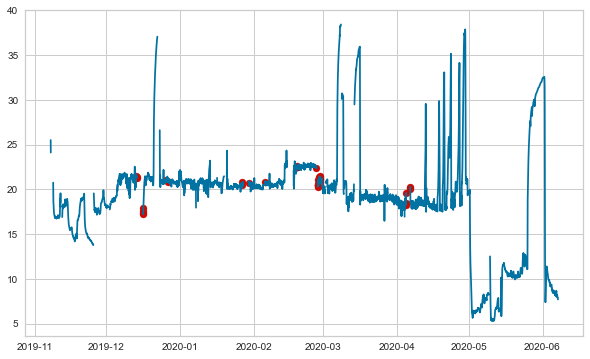

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(model_cof_results["temp"])
# create list of outlier_dates
outlier_dates = model_cof_results[model_cof_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [model_cof_results.loc[i]['temp'] for i in outlier_dates]

plt.scatter(outlier_dates, y_values, c="r")

plt.show()